In [1]:
import pandas as pd
import numpy as np

DATASET_FOLDER = "data"

In [2]:
data_load = pd.read_csv(DATASET_FOLDER + "/adult_reconstruction.csv")

data_load.head(5)

,hours-per-week,age,capital-gain,capital-loss,workclass,education,education-num,marital-status,relationship,race,gender,native-country,income,occupation
0,20,40,0,0,Private,Bachelors,13,Married-civ-spouse,Wife,White,Female,United-States,49100,Tech-support
1,40,21,0,0,Private,Some-college,10,Divorced,Own-child,White,Male,United-States,11500,Craft-repair
2,10,17,0,0,Private,11th,7,Never-married,Own-child,White,Male,United-States,2600,Other-service
3,50,51,0,0,Private,HS-grad,9,Married-civ-spouse,Husband,Asian-Pac-Islander,Male,Cambodia,38997,Sales
4,38,28,0,0,Private,Bachelors,13,Never-married,Not-in-family,White,Male,?,41400,Exec-managerial


In [3]:
for i in list(sorted(data_load["education-num"].unique())):
    data_filtered = data_load[data_load["education-num"] == i]
    print(f"{i}:\t {data_filtered['education'].iloc[0]}")

1:	 Preschool
2:	 1st-4th
3:	 5th-6th
4:	 7th-8th
5:	 9th
6:	 10th
7:	 11th
8:	 12th
9:	 HS-grad
10:	 Some-college
11:	 Assoc-voc
12:	 Assoc-acdm
13:	 Bachelors
14:	 Masters
15:	 Prof-school
16:	 Doctorate


In [4]:
converted_df = data_load.copy()

missing_mask = np.logical_not(np.any((converted_df == "?").to_numpy(), axis=1))
converted_df = converted_df.iloc[missing_mask, :]
converted_df["gender"] = (converted_df["gender"] == "Male").astype(int)
converted_df["native-country"] = (converted_df["native-country"] == "United-States").astype(int)
converted_df = converted_df.drop(columns="education")

categorical_variables = ["workclass", "marital-status", "relationship", "race", "occupation"]

for col in data_load.columns:
    if col in categorical_variables:
        onehot_df = pd.get_dummies(converted_df[col])
        onehot_df.columns = [f"{col}_{colname}" for colname in onehot_df.columns]
        converted_df = converted_df.join(onehot_df)
        converted_df = converted_df.drop(columns=[col])

converted_df.head()

,hours-per-week,age,capital-gain,capital-loss,education-num,gender,native-country,income,workclass_Federal-gov,workclass_Local-gov,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,20,40,0,0,13,0,1,49100,0,0,...,0,0,0,0,0,0,0,0,1,0
1,40,21,0,0,10,1,1,11500,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10,17,0,0,7,1,1,2600,0,0,...,0,0,0,1,0,0,0,0,0,0
3,50,51,0,0,9,1,0,38997,0,0,...,0,0,0,0,0,0,0,1,0,0
5,38,26,0,1876,13,1,1,38524,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
from sklearn.model_selection import train_test_split

X, y = converted_df.drop(columns=["income"]).to_numpy(), converted_df["income"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

## Train for classification

In [6]:
y_train_categorical = (y_train > 30000).astype(int)
y_test_categorical = (y_test > 30000).astype(int)

In [7]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=50, max_depth=7,
                                    max_samples=0.5, max_features=0.7,
                                    n_jobs=-1, random_state=42)
classifier.fit(X_train, y_train_categorical);

In [8]:
Y_pred_train = classifier.predict(X_train)
Y_pred_test = classifier.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(f'Train Accuracy = {accuracy_score(y_train_categorical, Y_pred_train):.4f}')
print(f' Test Accuracy = {accuracy_score(y_test_categorical, Y_pred_test):.4f}')
print(f'     Precision = {precision_score(y_test_categorical, Y_pred_test):.4f}')
print(f'        Recall = {recall_score(y_test_categorical, Y_pred_test):.4f}')
print(f'            F1 = {f1_score(y_test_categorical, Y_pred_test):.4f}')

Train Accuracy = 0.8194
 Test Accuracy = 0.8120
     Precision = 0.7905
        Recall = 0.8087
            F1 = 0.7995


/home/vetro_mihaly/miniconda3/envs/data-analysis/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 640x480 with 0 Axes>

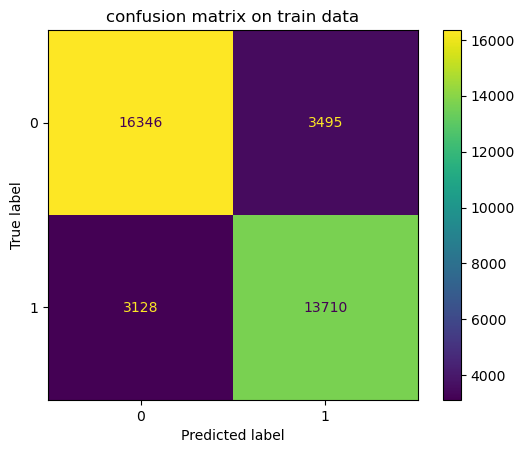

/home/vetro_mihaly/miniconda3/envs/data-analysis/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 640x480 with 0 Axes>

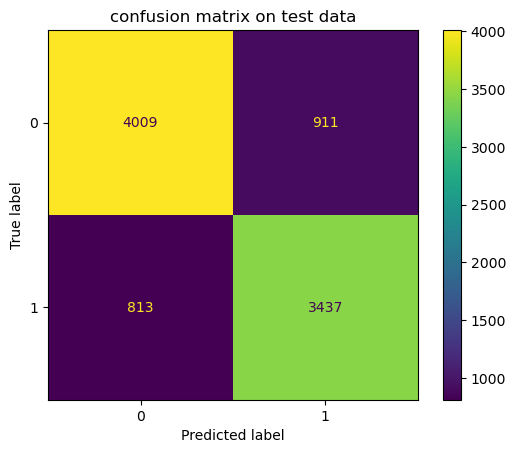

In [10]:
from matplotlib import pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plt.figure()
plot_confusion_matrix(classifier, X_train, y_train_categorical)
plt.title("confusion matrix on train data")
plt.show()

plt.figure()
plot_confusion_matrix(classifier, X_test, y_test_categorical)
plt.title("confusion matrix on test data")
plt.show();

## Train for regression

In [11]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators=50, max_depth=7,
                             max_samples=0.5, max_features=0.6,
                             n_jobs=-1, random_state=42)
regr.fit(X_train, y_train);

In [12]:
Y_pred_test = regr.predict(X_test)

In [13]:
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, max_error
print(f'          R2 Score = {r2_score(y_test, Y_pred_test):.4f}')
print(f'Explained Variance = {explained_variance_score(y_test, Y_pred_test):.4f}')
print(f'   Mean abs. error = {mean_absolute_error(y_test, Y_pred_test):.2f}')
print(f'         Max error = {max_error(y_test, Y_pred_test):.2f}')

          R2 Score = 0.6440
Explained Variance = 0.6443
   Mean abs. error = 11563.91
         Max error = 83152.78


In [14]:
train_errors = regr.predict(X_train) - y_train
test_errors = regr.predict(X_test) - y_test

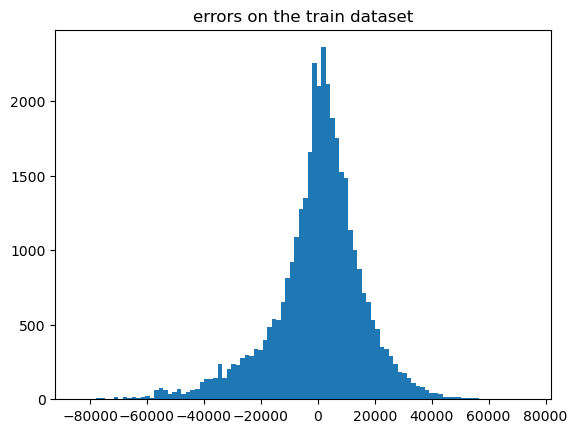

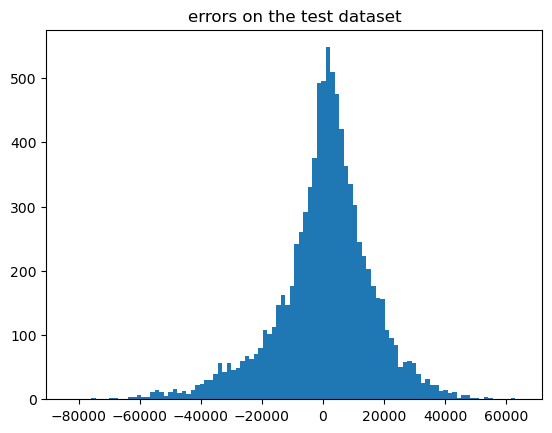

In [15]:
from matplotlib import pyplot as plt

plt.figure()
plt.hist(train_errors, bins=100)
plt.title("errors on the train dataset")
plt.show()

plt.figure()
plt.hist(test_errors, bins=100)
plt.title("errors on the test dataset")
plt.show();